# Country emissions dataset cleaning

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import itertools


# Supress warnings
import warnings
warnings.filterwarnings('ignore')

## Helper functions

In [2]:
def create_CO2eq_columns(df):
    # Define the conversion factors
    conversion_factors = {
        'N2O': 265,
        'CH4': 28
    }
    
    # Loop through the columns in the dataframe
    for column in df.columns:
        if 'N2O' in column:
            # Create a new column name for CO2eq
            new_column = column.replace('N2O', 'N2O_CO2eq')
            # Multiply by the N2O conversion factor
            df[new_column] = df[column] * conversion_factors['N2O']
            df.drop(column, axis=1, inplace=True)
        
        elif 'CH4' in column:
            # Create a new column name for CO2eq
            new_column = column.replace('CH4', 'CH4_CO2eq')
            # Multiply by the CH4 conversion factor
            df[new_column] = df[column] * conversion_factors['CH4']
            df.drop(column, axis=1, inplace=True)
    
    return df

def query_country(df, Area=None, target_col=None):
    if Area:
        query_df = df[df['Area'] == Area]
    else:
        Area = random.choice(df['Area'].unique())
        query_df = df[df['Area'] == Area]

    if query_df.empty:
        print(f"No data found for Area: {Area}")
        return pd.DataFrame()  # Return an empty DataFrame explicitly
    elif target_col:
        if target_col in query_df.columns:
            sns.lineplot(data=query_df, x='Year', y=target_col)
            plt.xticks(rotation=45)
            plt.show()
        else:
            print(f"Column '{target_col}' does not exist in the DataFrame.")
            return query_df

    return query_df

## Data loading

In [3]:
df = pd.read_parquet(r'../data/FAOSTAT/clean_data/all_tables_processed/full_country_dataset_v1.parquet')
df.fillna(0, inplace=True)

In [4]:
df.Area.nunique()

280

## Transforming NO2 and CH4 emissions to CO2eq emissions

In [5]:
for col in df.columns:
    if 'N2O' in col or 'CH4' in col:
        print(col)

In [6]:
print(df.shape)
create_CO2eq_columns(df)
print(df.shape)

(15482, 39)
(15482, 39)


## EDA

In [7]:
df.columns

Index(['Area Code', 'Area', 'Year',
       'Agricultural_Soils_Emissions_(CO2eq)_(AR5)_kt',
       'Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt',
       'Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt',
       'Burning_-_Crop_residues_Emissions_(CO2eq)_(AR5)_kt',
       'Crop_Residues_Emissions_(CO2eq)_(AR5)_kt',
       'Emissions_from_crops_Emissions_(CO2eq)_(AR5)_kt',
       'Emissions_from_livestock_Emissions_(CO2eq)_(AR5)_kt',
       'Emissions_on_agricultural_land_Emissions_(CO2eq)_(AR5)_kt',
       'Enteric_Fermentation_Emissions_(CO2eq)_(AR5)_kt',
       'Farm_gate_Emissions_(CO2eq)_(AR5)_kt',
       'Fertilizers_Manufacturing_Emissions_(CO2eq)_(AR5)_kt',
       'Fires_in_humid_tropical_forests_Emissions_(CO2eq)_(AR5)_kt',
       'Fires_in_organic_soils_Emissions_(CO2eq)_(AR5)_kt',
       'Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt',
       'Food_Packaging_Emissions_(CO2eq)_(AR5)_kt',
       'Food_Processing_Emissions_(CO2eq)_(AR5)_kt',
       'Food_Retail

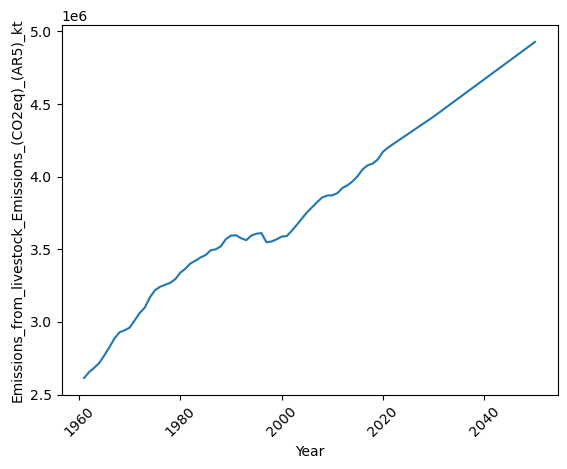

,Area Code,Area,Year,Agricultural_Soils_Emissions_(CO2eq)_(AR5)_kt,Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt,Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt,Burning_-_Crop_residues_Emissions_(CO2eq)_(AR5)_kt,Crop_Residues_Emissions_(CO2eq)_(AR5)_kt,Emissions_from_crops_Emissions_(CO2eq)_(AR5)_kt,Emissions_from_livestock_Emissions_(CO2eq)_(AR5)_kt,...,Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt,Rice_Cultivation_Emissions_(CO2eq)_(AR5)_kt,Savanna_fires_Emissions_(CO2eq)_(AR5)_kt,Synthetic_Fertilizers_Emissions_(CO2eq)_(AR5)_kt,Waste_Emissions_(CO2eq)_(AR5)_kt,Country_area_Area_1000_ha,Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No,Gross_Domestic_Product_Annual_growth_US$_per_capita_%,Gross_Domestic_Product_Value_US$_million_USD,Gross_Domestic_Product_Value_US$_per_capita_USD
13182,5000,World,1961,6.336218e+05,0.000000e+00,3.261682e+06,24148.1292,71809.0640,583898.3896,2.614406e+06,...,0.000000e+00,487941.1964,0.0000,63377.4795,0.000000e+00,1.344487e+07,3068370.619,0.000000,0.000000e+00,0.000000
13183,5000,World,1962,6.529202e+05,0.000000e+00,3.331566e+06,24298.3565,75109.2150,604886.2543,2.655116e+06,...,0.000000e+00,505478.6828,0.0000,71563.2500,0.000000e+00,1.344487e+07,3126686.740,0.000000,0.000000e+00,0.000000
13184,5000,World,1963,6.688138e+05,0.000000e+00,3.371303e+06,24746.0364,75746.7785,606444.8937,2.684119e+06,...,0.000000e+00,505952.0788,0.0000,80738.8485,0.000000e+00,1.344487e+07,3195779.257,0.000000,0.000000e+00,0.000000
13185,5000,World,1964,6.897114e+05,0.000000e+00,3.439564e+06,25362.5341,79410.2710,631446.0851,2.717691e+06,...,0.000000e+00,526673.2800,0.0000,90426.6920,0.000000e+00,1.344487e+07,3267212.339,0.000000,0.000000e+00,0.000000
13186,5000,World,1965,7.148384e+05,0.000000e+00,3.504320e+06,25301.1165,78983.1970,630202.3047,2.769880e+06,...,0.000000e+00,525917.9912,0.0000,104237.4850,0.000000e+00,1.344487e+07,3337111.985,0.000000,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13240,5000,World,2019,2.401017e+06,1.275217e+06,1.637623e+07,38351.3144,308472.2033,896276.8873,4.119766e+06,...,5.125927e+06,706096.3510,222659.1586,720042.7383,2.421685e+06,1.350950e+07,7764951.042,0.246713,8.711735e+07,11259.067018
13241,5000,World,2020,2.426496e+06,1.279673e+06,1.603626e+07,39345.3434,305456.6547,911475.6098,4.172356e+06,...,5.129398e+06,718004.4068,220987.2891,752775.8283,2.453340e+06,1.351014e+07,7840952.880,-3.785703,8.464178e+07,10832.832185
13242,5000,World,2021,1.828586e+06,1.281260e+06,1.622754e+07,37865.8953,195852.7550,919891.1891,4.200815e+06,...,5.334069e+06,686172.5388,221233.6313,599706.3155,2.491378e+06,1.408563e+07,7909295.146,12.347087,9.592342e+07,12170.371471
13243,5000,World,2030,0.000000e+00,0.000000e+00,0.000000e+00,33883.5209,185158.0705,888705.1342,4.414166e+06,...,0.000000e+00,669663.5428,0.0000,669743.2980,0.000000e+00,0.000000e+00,8546141.335,0.000000,0.000000e+00,0.000000


In [8]:
query_country(df, "World", target_col='Emissions_from_livestock_Emissions_(CO2eq)_(AR5)_kt')

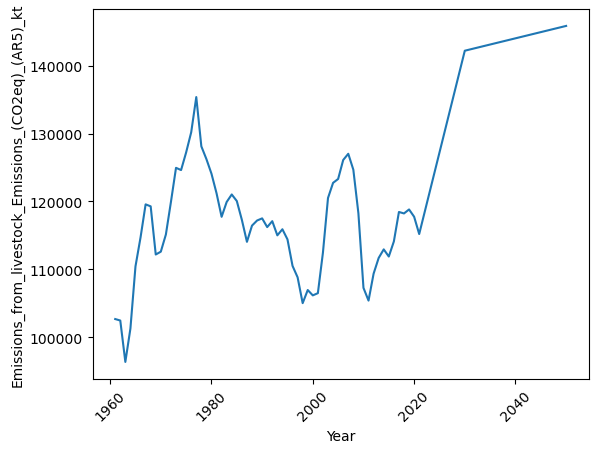

,Area Code,Area,Year,Agricultural_Soils_Emissions_(CO2eq)_(AR5)_kt,Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt,Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt,Burning_-_Crop_residues_Emissions_(CO2eq)_(AR5)_kt,Crop_Residues_Emissions_(CO2eq)_(AR5)_kt,Emissions_from_crops_Emissions_(CO2eq)_(AR5)_kt,Emissions_from_livestock_Emissions_(CO2eq)_(AR5)_kt,...,Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt,Rice_Cultivation_Emissions_(CO2eq)_(AR5)_kt,Savanna_fires_Emissions_(CO2eq)_(AR5)_kt,Synthetic_Fertilizers_Emissions_(CO2eq)_(AR5)_kt,Waste_Emissions_(CO2eq)_(AR5)_kt,Country_area_Area_1000_ha,Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No,Gross_Domestic_Product_Annual_growth_US$_per_capita_%,Gross_Domestic_Product_Value_US$_million_USD,Gross_Domestic_Product_Value_US$_per_capita_USD
411,9,Argentina,1961,23849.7880,0.0000,104526.6115,440.8878,989.3510,1790.8788,102689.4372,...,0.0000,360.6400,0.0000,46.2955,0.0000,278040.0,20680.653,0.000000,0.000000,0.000000
412,9,Argentina,1962,23587.6235,0.0000,104256.5428,416.0073,905.8760,1737.8737,102471.1811,...,0.0000,415.9904,0.0000,47.4880,0.0000,278040.0,21020.359,0.000000,0.000000,0.000000
413,9,Argentina,1963,22628.3235,0.0000,98549.1425,479.2319,1190.1150,2079.3789,96377.7821,...,0.0000,410.0320,0.0000,91.9815,0.0000,278040.0,21364.017,0.000000,0.000000,0.000000
414,9,Argentina,1964,23880.3955,0.0000,103740.6508,527.6611,1390.9850,2342.1629,101288.1419,...,0.0000,423.5168,0.0000,110.3460,0.0000,278040.0,21708.487,0.000000,0.000000,0.000000
415,9,Argentina,1965,25381.8855,0.0000,112544.6001,480.4056,950.0780,1962.6628,110444.0048,...,0.0000,532.1792,0.0000,137.9325,0.0000,278040.0,22053.661,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,9,Argentina,2019,40369.3050,11623.1193,261268.3326,941.7826,7516.7250,9895.4620,118823.0839,...,49879.0167,1436.9544,1423.7245,7054.3530,15198.5000,278040.0,44745.520,-15.317002,447754.686715,10006.693111
470,9,Argentina,2020,40729.0425,11646.7400,259409.7389,1014.2921,7408.1015,9875.1456,117750.8624,...,47687.9779,1452.7520,3541.5896,7726.8435,15041.3000,278040.0,45036.032,-14.450161,385540.406816,8560.709940
471,9,Argentina,2021,41454.1355,11600.2873,263360.2653,1041.6040,7284.4260,9893.9740,115204.5896,...,52755.7974,1567.9440,1448.4277,9148.4095,15222.2403,278040.0,45276.780,25.703144,487227.125386,10761.081627
472,9,Argentina,2030,0.0000,0.0000,0.0000,666.6701,7502.4150,10599.2303,142191.9341,...,0.0000,2430.1452,0.0000,8564.9855,0.0000,0.0,47678.560,0.000000,0.000000,0.000000


In [9]:
query_country(df, "Argentina", target_col='Emissions_from_livestock_Emissions_(CO2eq)_(AR5)_kt')

### Add missing country year combinations

There is a lot of missing data.

**Will select 1980-2021 for real data and projections for 2022-2030**

Then backfill and forward fill the missing data.

In [10]:
# Assuming df is your original DataFrame
countries = df['Area Code'].unique()
years = range(1980, 2031)

# Create a cartesian product of all unique countries and years
cartesian_product = list(itertools.product(countries, years))

In [11]:
print(df.shape)
# Create a DataFrame from the cartesian product
complete_df = pd.DataFrame(cartesian_product, columns=['Area Code', 'Year'])

# Merge with the original DataFrame to fill in missing combinations with NaN
df = complete_df.merge(df, on=['Area Code', 'Year'], how='left')
print(df.shape)

(15482, 39)
(14280, 39)


<Axes: xlabel='Area', ylabel='Year'>

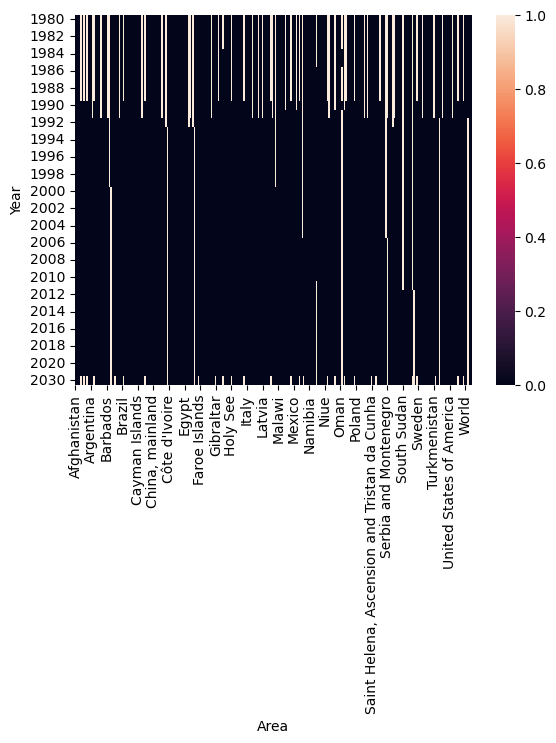

In [12]:
pivot_df = df.pivot_table(
    index = "Year", 
    columns="Area", 
    values="Crop_Residues_Emissions_(CO2eq)_(AR5)_kt").isnull()

sns.heatmap(pivot_df)

In [13]:
real_df = df[(df.Year >= 1980) & (df.Year <= 2021)] #up to 2021 for emissions data
proj_df = df[(df.Year > 2021) & (df.Year <= 2030)] #projections for 2022-2030

## NaN imputation

In [14]:
real_df.isnull().sum().sum()

34040

In [15]:
for col in real_df.columns:
    real_df[col] = real_df.groupby(["Area Code"])[col].transform(lambda series: series.ffill().bfill())

## Cleaning and adding emissions

# save the processed data

In [ ]:
projection_cols = ['Area Code', 'Area', 'Year', 'Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No']
proj_df = proj_df[projection_cols]

proj_df.to_parquet(r'../data/FAOSTAT/clean_data/all_tables_processed/population_projections.parquet', index=False)

In [ ]:
real_df.to_parquet(r'../data/FAOSTAT/clean_data/all_tables_processed/full_country_dataset_v2_imputed.parquet', index=False)